In [1]:
import pydocumentdb
import pydocumentdb.document_client as document_client
import json

# Load config info with values from portal
with open('config.json') as config_file:
    config = json.load(config_file)

# Initialize the Python DocumentDB client
client = document_client.DocumentClient(config["endPoint"], {'masterKey': config["masterKey"]})

# Initialize link to the collection
coll = 'dbs/%s/colls/%s' % ("wwidb", "wwi")

In [2]:
#Submit a query using QueryDocuments
query = {'query' : 'SELECT * FROM p WHERE p.PersonId = 27'}
options = {'enableCrossPartitionQuery': True}

result_iterable = client.QueryDocuments(coll, query, options)
results = list(result_iterable)

print results

[{u'_self': u'dbs/+JwVAA==/colls/+JwVANprCwA=/docs/+JwVANprCwAoBAAAAAAAAA==/', u'IsExternalLogonProvider': False, u'_ts': 1495627093, u'EmailAddress': u'billl@fabrikam.com', u'SearchName': u'Bill Bill Lawson', u'PersonId': 27, u'IsSalesperson': False, u'EntityType': u'Person', u'_rid': u'+JwVANprCwAoBAAAAAAAAA==', u'FaxNumber': u'(203) 555-0107', u'IsEmployee': False, u'partitionKey': 27, u'PhoneNumber': u'(203) 555-0107', u'IsPermittedToLogon': False, u'_etag': u'"0000b1f6-0000-0000-0000-592575550000"', u'LogonName': u'NO LOGON', u'FullName': u'Bill Lawson', u'_attachments': u'attachments/', u'id': u'F31E9851-F0C2-4FC5-BF92-B808729ABD7D', u'IsSystemUser': True, u'PreferredName': u'Bill'}]


In [ ]:
#Prepare updated document...
updated = results[0]
updated["EmailAddress"] = 'billl@fabrikam.com'

#...and update using UpsertDocument
client.UpsertDocument(coll, updated)

In [ ]:
#Prepare a new Document...
newdoc = {
    "PersonId": 9999,     
    "IsSalesperson": False,
    "partitionKey": 27 % 400,  
    "PhoneNumber": "(813) 555-1212",
    "LogonName": "NO LOGON",
    "FullName": "Fred Flintstone",
    "IsSystemUser": True,
    "SearchName": "Fred Fred Flintstone",
    "EntityType": "Person",
    "IsEmployee": False,
    "EmailAddress": "fflintstone@slategravelco.com",
    "IsExternalLogonProvider": False,    
    "IsPermittedToLogon": False,
    "PreferredName": "Fred"                            
}

#...and insert using UpsertDocument
client.UpsertDocument(coll, newdoc)

In [ ]:
#Delete a document using DeleteDocument
id = '3d4d3cba-4262-404c-b71c-fe01beb31e65'
deldoc = '%s/docs/%s' % (coll, id)
client.DeleteDocument(deldoc)

In [7]:
# Init & execute sproc using ExecuteStoredProcedure
sp = '%s/sprocs/%s' % (coll, 'spJoinOrderSalesperson')
result = client.ExecuteStoredProcedure(sp, None)
print result

[{"PersonId":2,"FullName":"Kayla Woodcock","OrderId":1,"OrderTotal":2300},{"PersonId":2,"FullName":"Kayla Woodcock","OrderId":45},{"PersonId":2,"FullName":"Kayla Woodcock","OrderId":16,"OrderTotal":68},{"PersonId":2,"FullName":"Kayla Woodcock","OrderId":31,"OrderTotal":2300},{"PersonId":2,"FullName":"Kayla Woodcock","OrderId":57,"OrderTotal":180},{"PersonId":3,"FullName":"Hudson Onslow","OrderId":32,"OrderTotal":245},{"PersonId":3,"FullName":"Hudson Onslow","OrderId":80,"OrderTotal":78},{"PersonId":3,"FullName":"Hudson Onslow","OrderId":53,"OrderTotal":11988},{"PersonId":3,"FullName":"Hudson Onslow","OrderId":5,"OrderTotal":128},{"PersonId":3,"FullName":"Hudson Onslow","OrderId":48,"OrderTotal":1296},{"PersonId":3,"FullName":"Hudson Onslow","OrderId":11,"OrderTotal":13},{"PersonId":3,"FullName":"Hudson Onslow","OrderId":15,"OrderTotal":150},{"PersonId":6,"FullName":"Sophia Hinton","OrderId":27,"OrderTotal":65},{"PersonId":6,"FullName":"Sophia Hinton","OrderId":83,"OrderTotal":6122},{"P

In [8]:
# BONUS 1: Use pandas to navigate the results
import pandas as pd
df = pd.read_json(result)
print df

              FullName  OrderId  OrderTotal  PersonId
0       Kayla Woodcock        1      2300.0         2
1       Kayla Woodcock       45         NaN         2
2       Kayla Woodcock       16        68.0         2
3       Kayla Woodcock       31      2300.0         2
4       Kayla Woodcock       57       180.0         2
5        Hudson Onslow       32       245.0         3
6        Hudson Onslow       80        78.0         3
7        Hudson Onslow       53     11988.0         3
8        Hudson Onslow        5       128.0         3
9        Hudson Onslow       48      1296.0         3
10       Hudson Onslow       11        13.0         3
11       Hudson Onslow       15       150.0         3
12       Sophia Hinton       27        65.0         6
13       Sophia Hinton       83      6122.0         6
14       Sophia Hinton       64       648.0         6
15       Sophia Hinton       67      4950.0         6
16       Sophia Hinton       34        65.0         6
17       Sophia Hinton      

In [9]:
# BONUS 2: Pandas group by
subtotal = df.groupby('FullName')['OrderTotal'].sum()
print subtotal

FullName
Amy Trefl             15592.0
Anthony Grosse        19623.0
Archer Lamble          2210.0
Hudson Hollinworth     5760.0
Hudson Onslow         13898.0
Jack Potter            5149.0
Kayla Woodcock         4848.0
Lily Code              4338.0
Sophia Hinton         16719.0
Taj Shand             11142.0
Name: OrderTotal, dtype: float64


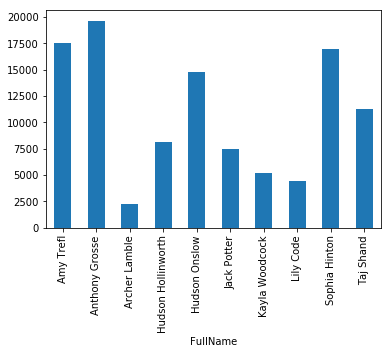

In [6]:
# BONUS 3: Bar plot
%matplotlib inline
import matplotlib.pyplot as plt

subtotal.plot(kind='bar')